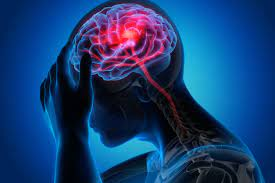

## TABLE OF CONTENTS

[A - PREFACE & PROBLEM DEFINED](#preface)
* [Atribute Information](#atributeinformation)

[B - LIBRARIES NEEDED IN THE STUDY](#libraries)
* [User Defined Functions](#userdefinedfunctions)

[C - ANALYSIS](#analysis)
* [1) Reading the Dataset](#readingthedataset)
* [2) Exploratory Data Analysis (EDA) & Visualization](#eda)
    * [2.1 - A General Looking at the Data](#generallook)
    * [2.2 - Data Cleaning](#datacleaning)
    * [2.3 - The Examination of Target Variable](#targetvariable)
    * [2.4 - Numerical Features](#numericalvariables)    
    * [2.5 - Examination of Skewness](#skewness)     
    * [2.6 - Handling with Skewness](#handlinghskewness)    
        * [The Application of np.log](#np.log)
        * [The Aplication of PowerTransformer](#powertransformer)        
    * [2.7 - Categorical Features](#categoricalfeatures)          
        * [gender & stroke](#gender&stroke)
        * [ever_married & stroke](#married&stroke)
        * [work_type & stroke](#work_type&stroke)
        * [residence_type & stroke](#residence_type&stroke) 
        * [smoking_status & stroke](#smoking_status&stroke)
    * [2.8 - Getting Dummies](#dummies)          
* [3) The Implementation of Support Vector Machine (SVM)](#svm)        
    * [3.1 - Train | Test Split & Handling with Missing Values](#tts)
    * [3.2 - Scalling](#scalling)
    * [3.3 - Modelling](#modelling)        
        * [SVM Modelling by Default Parameters](#svmmodelling)      
        * [SVM With Best Parameters (GridsearchCV)](#GridsearchCV) 
* [4) Conclusion](#Conclusion)  

## A - PREFACE & PROBLEM DEFINED <a class="anchor" id="preface"></a>

In this Exploratory Data Analysis (EDA) and Model Classification using Support Vector Machine (SVM), we will examine the dataset named as "Stroke Prediction Dataset" under the 'stroke-prediction-dataset' file at Kaggle website [external link text](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

This study, in general, will cover what any beginner in Machine Learning can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. Later S/he will be familiar with SVM Classification modelling. 

Context emphasizes that "According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient."

### Attribute Information <a class="anchor" id="atributeinformation"></a>

**1) id:** unique identifier

**2) gender:** "Male", "Female" or "Other"

**3) age:** age of the patient

**4) hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**5) heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**6) ever_married:** "No" or "Yes"

**7) work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**8) Residence_type:** "Rural" or "Urban"

**9) avg_glucose_level:** average glucose level in blood

**10) bmi:** body mass index

**11) smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

**12) stroke:** 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

## B - LIBRARIES NEEDED IN THE STUDY <a class="anchor" id="libraries"></a>

The first step is to import the required libraries.

For the visualization, the study will use both Seaborn and Plotly's interactive environment for making a better and meaningful comparison with related subjects.

If your plotly module is not in your working environment, please download plotly and run the following codes.

First --> pip install plotly==5.1.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

### User Defined Functions <a class="anchor" id="userdefinedfunctions"></a>

In [2]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [3]:
# Function for comparing different approaches

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVC(class_weight = "balanced", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_valid, preds)

Now it's time to jump on the analysis of dataset.

## C -  ANALYSIS <a class="anchor" id="analysis"></a>

## 1) Reading the Dataset <a class="anchor" id="readingthedataset"></a>

How to read and assign the dataset as df. [external link text](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (You can define it as what you want instead of df)

In [4]:
df0 = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [5]:
df = df0.copy()

In [6]:
df.head()

id  gender        age  hypertension  heart_disease ever_married  \
0   9046    Male 67.0000000             0              1          Yes   
1  51676  Female 61.0000000             0              0          Yes   
2  31112    Male 80.0000000             0              1          Yes   
3  60182  Female 49.0000000             0              0          Yes   
4   1665  Female 79.0000000             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban        228.6900000 36.6000000   
1  Self-employed          Rural        202.2100000        NaN   
2        Private          Rural        105.9200000 32.5000000   
3        Private          Urban        171.2300000 34.4000000   
4  Self-employed          Rural        174.1200000 24.0000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

## 2) Exploratory Data Analysis (EDA) & Visualization <a class="anchor" id="eda"></a>

### 2.1 - A General Looking at the Data <a class="anchor" id="generallook"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Our dataset demonstrates;

- 7 numeric variable including (4) int64 and (3) float64 data types out of 7.

- 5 non-numeric variable including (5) object types out of 5.

- In our dataset, we have both numerical and categorical variables.

- It is critical to determine if the columns are correctly designed.

- For the analysis, it is critical to determine our target (label) variable which is "stroke" in the given study.

- It is critical to determine if stroke is an integer/binary type or not.

- In this dataset, target variable is coded as 1 for positive cases (having stroke) and 0 for negative cases (not having stroke).

- Both Hypertension and heart disease have integer data types, not as an object.

- Like our Target variable (stroke), both hypertension and heart_disease are coded as 1 for the positive cases and 0 for negative cases.

- In addition, we have 5 categorical variables, which needs to be converted to dummies.

**describe()** function gives us a general descriptive summary of each continuous attribute such as the count, mean, the min, max values and some percentiles as well.

In [8]:
df.describe().T

count          mean           std        min  \
id                5110.0000000 36517.8293542 21161.7216248 67.0000000   
age               5110.0000000    43.2266145    22.6126467  0.0800000   
hypertension      5110.0000000     0.0974560     0.2966067  0.0000000   
heart_disease     5110.0000000     0.0540117     0.2260630  0.0000000   
avg_glucose_level 5110.0000000   106.1476771    45.2835602 55.1200000   
bmi               4909.0000000    28.8932369     7.8540667 10.3000000   
stroke            5110.0000000     0.0487280     0.2153199  0.0000000   

                            25%           50%           75%           max  
id                17741.2500000 36932.0000000 54682.0000000 72940.0000000  
age                  25.0000000    45.0000000    61.0000000    82.0000000  
hypertension          0.0000000     0.0000000     0.0000000     1.0000000  
heart_disease         0.0000000     0.0000000     0.0000000     1.0000000  
avg_glucose_level    77.2450000    91.8850000   114.0900000   271.7400000  
bmi                  23.5000000    28.1000000    33.1000000    97.6000000  
stroke                0.0000000     0.0000000     0.0000000     1.0000000

In [9]:
df.describe(include=object).T

count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
smoking_status  5110      4  never smoked  1892

In [10]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 5110 instances and 11 attributes.


In [11]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
df.duplicated().value_counts()

False    5110
dtype: int64

In the given dataset, we have no duplicated rows.

In [13]:
missing(df)

Missing_Number  Missing_Percent
bmi                           201        0.0393346
id                              0        0.0000000
gender                          0        0.0000000
age                             0        0.0000000
hypertension                    0        0.0000000
heart_disease                   0        0.0000000
ever_married                    0        0.0000000
work_type                       0        0.0000000
Residence_type                  0        0.0000000
avg_glucose_level               0        0.0000000
smoking_status                  0        0.0000000
stroke                          0        0.0000000

In the given dataset, there have been 201 missing values in the column of "bmi". These missing values will be handled with after Train & Split process for preventing data leakage.

The proportion of target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

In [14]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [15]:
df['stroke'].value_counts(normalize=True)*100

0   95.1272016
1    4.8727984
Name: stroke, dtype: float64

In [16]:
y = df['stroke']
print(f'Percentage of patient has a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} -->\
     ({y.value_counts()[1]} patient)\nPercentage of patient does not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient has a stroke: % 4.87 -->     (249 patient)
Percentage of patient does not have a stroke: % 95.13 --> (4861 patient)


With normalize set to True, we can obtain the relative frequencies by dividing all values by the sum of values.

In this sense, almost %95 of the instances in our target variable haven't experienced with 'stroke' representing 4861 patients. 

On the other hand %5 of the instances in our target variable go through 'Stroke' representing 249 patient.

Similarly, it's clear that the proportinate distribution for each class is not the case here. So we should assume an imbalanced data we have in the given case.

### 2.2 - Data Cleaning <a class="anchor" id="datacleaning"></a>

In "id" column, all the values are unique. Let's drop the "id" column.

In [17]:
df.drop('id', axis=1, inplace=True)

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The column of 'Residence_type' begins with uppercase while others are not. To make a standardize grammer to prevent mistake we will change all column names into lowercase

In [19]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

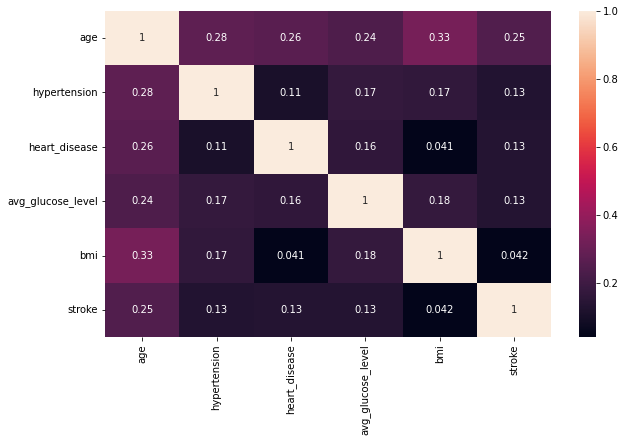

In [21]:
sns.heatmap(df.corr(), annot=True);

Let's split our features into two part, numerical and categorical, for easing our further examination. 

In [22]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print("\033[1m", "Numerical Columns:", "\033[0;0m",  numerical)
print("------------------------------------------------------------------------------------------------------------------")
print("\033[1m", "Categorical Columns:", "\033[0;0m", categorical)

 Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
------------------------------------------------------------------------------------------------------------------
 Categorical Columns:  Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


In [23]:
df[numerical].shape

(5110, 5)

### 2.3 - The Examination of Target Variable <a class="anchor" id="targetvariable"></a>

In [24]:
df['stroke'].describe().T

count   5110.0000000
mean       0.0487280
std        0.2153199
min        0.0000000
25%        0.0000000
50%        0.0000000
75%        0.0000000
max        1.0000000
Name: stroke, dtype: float64

In [25]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
print( f"Skewness: {df['stroke'].skew()}")

Skewness: 4.193284486071313


In [27]:
df['stroke'].iplot(kind='hist')

### 2.4 - Numerical Features <a class="anchor" id="numericalvariables"></a>

In [28]:
df[numerical].describe().T

count        mean        std        min        25%  \
age               5110.0000000  43.2266145 22.6126467  0.0800000 25.0000000   
hypertension      5110.0000000   0.0974560  0.2966067  0.0000000  0.0000000   
heart_disease     5110.0000000   0.0540117  0.2260630  0.0000000  0.0000000   
avg_glucose_level 5110.0000000 106.1476771 45.2835602 55.1200000 77.2450000   
bmi               4909.0000000  28.8932369  7.8540667 10.3000000 23.5000000   

                         50%         75%         max  
age               45.0000000  61.0000000  82.0000000  
hypertension       0.0000000   0.0000000   1.0000000  
heart_disease      0.0000000   0.0000000   1.0000000  
avg_glucose_level 91.8850000 114.0900000 271.7400000  
bmi               28.1000000  33.1000000  97.6000000

In [29]:
df[numerical].iplot(kind='hist');

In [30]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [31]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
for i in df.drop(columns=["stroke", 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all")

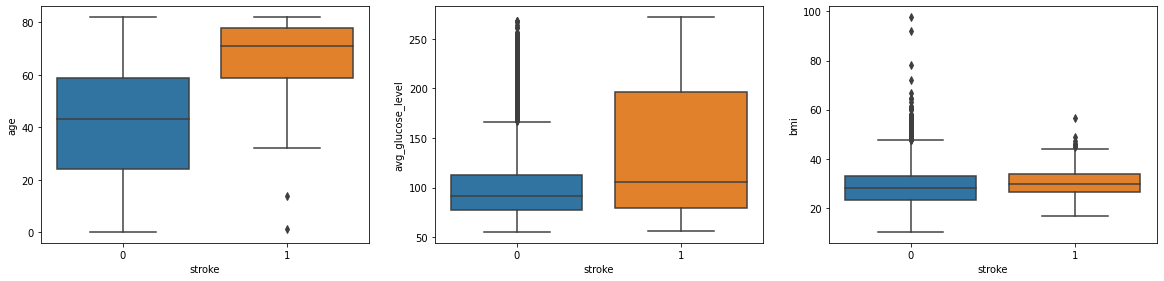

In [33]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=df)

In [34]:
df[(df['age'] <= 14) & (df['stroke'] == 1)] 

gender        age  hypertension  heart_disease ever_married work_type  \
162  Female  1.3200000             0              0           No  children   
245  Female 14.0000000             0              0           No  children   

    residence_type  avg_glucose_level        bmi smoking_status  stroke  
162          Urban         70.3700000        NaN        Unknown       1  
245          Rural         57.9300000 30.9000000        Unknown       1

In [35]:
df.age.value_counts()

78.0000000    102
57.0000000     95
52.0000000     90
54.0000000     87
51.0000000     86
             ... 
1.4000000       3
0.4800000       3
0.1600000       3
0.4000000       2
0.0800000       2
Name: age, Length: 104, dtype: int64

In [36]:
df[df['age'] < 2]

gender       age  hypertension  heart_disease ever_married work_type  \
162   Female 1.3200000             0              0           No  children   
363   Female 0.6400000             0              0           No  children   
376   Female 0.8800000             0              0           No  children   
562   Female 1.8000000             0              0           No  children   
564   Female 0.3200000             0              0           No  children   
...      ...       ...           ...            ...          ...       ...   
4934    Male 1.3200000             0              0           No  children   
5032  Female 1.2400000             0              0           No  children   
5079    Male 1.7200000             0              0           No  children   
5089  Female 0.7200000             0              0           No  children   
5095    Male 1.0800000             0              0           No  children   

     residence_type  avg_glucose_level        bmi smoking_status  stroke  
162           Urban         70.3700000        NaN        Unknown       1  
363           Urban         83.8200000 24.9000000        Unknown       0  
376           Rural         88.1100000 15.5000000        Unknown       0  
562           Urban         58.2600000 16.5000000        Unknown       0  
564           Rural         73.7100000 16.2000000        Unknown       0  
...             ...                ...        ...            ...     ...  
4934          Rural        107.0200000        NaN        Unknown       0  
5032          Rural         61.9400000 20.3000000        Unknown       0  
5079          Urban         77.2800000 17.1000000        Unknown       0  
5089          Rural         62.1300000 16.8000000        Unknown       0  
5095          Rural         79.1500000 17.4000000        Unknown       0  

[120 rows x 11 columns]

### 2.5 - Examination of Skewness <a class="anchor" id="skewness"></a>

In [37]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

heart_disease       3.9472440
hypertension        2.7153917
avg_glucose_level   1.5722839
bmi                 1.0553402
dtype: float64

Some features have skewness. After visualizing them we will try to handle with their skewness by "np.log" and "PowerTransformer". Let's first take a close look at those in details.

In [38]:
df[skew_cols.index].iplot(kind='hist');

In [39]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

### 2.6 - Handling with Skewness <a class="anchor" id="handlinghskewness"></a>

Skewness is a key statistics concept you must know in the data science and analytics fields.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. 

The primary reason skewness is important is that any analysis based on normal distribution incorrectly estimates expected returns and risk.

For more information please refer to [external link text](https://en.wikipedia.org/wiki/Skewness) [external link text](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/) [external link text](http://www.fusioninvesting.com/2010/09/what-is-skew-and-why-is-it-important/)

In [40]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols = skew_cols.drop(['heart_disease', 'hypertension'])
skew_cols

avg_glucose_level   1.5722839
bmi                 1.0553402
dtype: float64

**The Application of np.log** <a class="anchor" id="np.log"></a>

For more information on np.log please refer to [external link text](https://www.javatpoint.com/numpy-log)

In [41]:
df_try = df.copy()
for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)
print(df_try[skew_cols.index].skew())
print()
df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

avg_glucose_level   0.8894698
bmi                 0.0319127
dtype: float64



**The Aplication of PowerTransformer** <a class="anchor" id="powertransformer"></a> 

For more information on PowerTransformer please refer to [external link text](https://machinelearningmastery.com/power-transforms-with-scikit-learn/)

In [42]:
df_trans = df[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

avg_glucose_level    0.0845736
bmi                 -0.0007424
dtype: float64



Now it's time to get rid of these skewed features from our dataset and concatenate unskewed ones with the dataset. 

In [43]:
df.shape

(5110, 11)

In [44]:
df.drop(["avg_glucose_level", "bmi"], axis=1, inplace=True)

In [45]:
df.shape

(5110, 9)

In [46]:
df_trans.shape

(5110, 2)

In [47]:
df = pd.concat([df, df_trans], axis=1)

In [48]:
df.shape

(5110, 11)

In [49]:
df

gender        age  hypertension  heart_disease ever_married  \
0       Male 67.0000000             0              1          Yes   
1     Female 61.0000000             0              0          Yes   
2       Male 80.0000000             0              1          Yes   
3     Female 49.0000000             0              0          Yes   
4     Female 79.0000000             1              0          Yes   
...      ...        ...           ...            ...          ...   
5105  Female 80.0000000             1              0          Yes   
5106  Female 81.0000000             0              0          Yes   
5107  Female 35.0000000             0              0          Yes   
5108    Male 51.0000000             0              0          Yes   
5109  Female 44.0000000             0              0          Yes   

          work_type residence_type   smoking_status  stroke  \
0           Private          Urban  formerly smoked       1   
1     Self-employed          Rural     never smoked       1   
2           Private          Rural     never smoked       1   
3           Private          Urban           smokes       1   
4     Self-employed          Rural     never smoked       1   
...             ...            ...              ...     ...   
5105        Private          Urban     never smoked       0   
5106  Self-employed          Urban     never smoked       0   
5107  Self-employed          Rural     never smoked       0   
5108        Private          Rural  formerly smoked       0   
5109       Govt_job          Urban          Unknown       0   

      avg_glucose_level        bmi  
0             1.8623579  1.0256983  
1             1.7004136        NaN  
2             0.3947141  0.5773829  
3             1.4449411  0.7918351  
4             1.4727475 -0.5679023  
...                 ...        ...  
5105         -0.3487115        NaN  
5106          0.8222961  1.3605428  
5107         -0.3814413  0.3499143  
5108          1.3950990 -0.3240754  
5109         -0.2846356 -0.2365446  

[5110 rows x 11 columns]

In the "gender" column there has been an undefined classification which makes no contribution to understand stroke. So let's discard this row from the analysis.

In [50]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [51]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [52]:
df.shape

(5109, 11)

In [53]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### 2.7 - Categorical Features <a class="anchor" id="categoricalfeatures"></a> 

In [54]:
df[categorical].head().T

0              1             2        3  \
gender                     Male         Female          Male   Female   
ever_married                Yes            Yes           Yes      Yes   
work_type               Private  Self-employed       Private  Private   
residence_type            Urban          Rural         Rural    Urban   
smoking_status  formerly smoked   never smoked  never smoked   smokes   

                            4  
gender                 Female  
ever_married              Yes  
work_type       Self-employed  
residence_type          Rural  
smoking_status   never smoked

In [55]:
df[categorical].describe()

gender ever_married work_type residence_type smoking_status
count     5109         5109      5109           5109           5109
unique       2            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2924           2596           1892

### gender & stroke  <a class="anchor" id="gender&stroke"></a> 

In [56]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))


In [57]:
first_looking("gender")

column name    :  gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Female    2994
Male      2115
Name: gender, dtype: int64


In [58]:
print(df.groupby('gender')['stroke'].mean().sort_values())
print()
df.groupby('gender')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

gender
Female   0.0470942
Male     0.0510638
Name: stroke, dtype: float64



### ever_married & stroke <a class="anchor" id="married&stroke"></a> 

In [59]:
first_looking("ever_married")

column name    :  ever_married
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Yes    3353
No     1756
Name: ever_married, dtype: int64


In [60]:
print(df.groupby('ever_married')['stroke'].mean().sort_values())
print()
df.groupby('ever_married')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

ever_married
No    0.0165148
Yes   0.0656129
Name: stroke, dtype: float64



### work_type & stroke <a class="anchor" id="work_type&stroke"></a> 

In [61]:
first_looking("work_type")

column name    :  work_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [62]:
print(df.groupby('work_type')['stroke'].mean().sort_values())
print()
df.groupby('work_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

work_type
Never_worked    0.0000000
children        0.0029112
Govt_job        0.0502283
Private         0.0509576
Self-employed   0.0793651
Name: stroke, dtype: float64



### residence_type & stroke <a class="anchor" id="residence_type&stroke"></a>  

In [63]:
first_looking("residence_type")

column name    :  residence_type
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
Urban    2596
Rural    2513
Name: residence_type, dtype: int64


In [64]:
print(df.groupby('residence_type')['stroke'].mean().sort_values())
print()
df.groupby('residence_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

residence_type
Rural   0.0453641
Urban   0.0520031
Name: stroke, dtype: float64



### smoking_status & stroke <a class="anchor" id="smoking_status&stroke"></a>

In [65]:
first_looking("smoking_status")

column name    :  smoking_status
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


In [66]:
print(df.groupby('smoking_status')['stroke'].mean().sort_values())
print()
df.groupby('smoking_status')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

smoking_status
Unknown           0.0304404
never smoked      0.0475687
smokes            0.0532319
formerly smoked   0.0791855
Name: stroke, dtype: float64



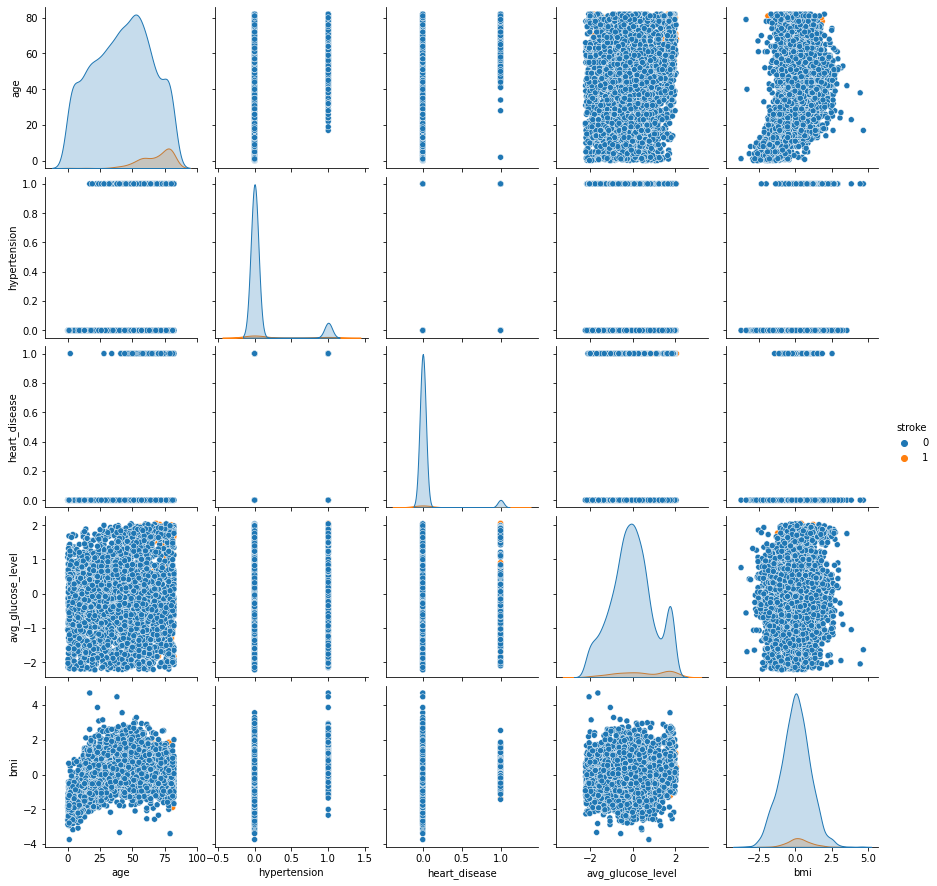

In [67]:
sns.pairplot(df, hue="stroke");

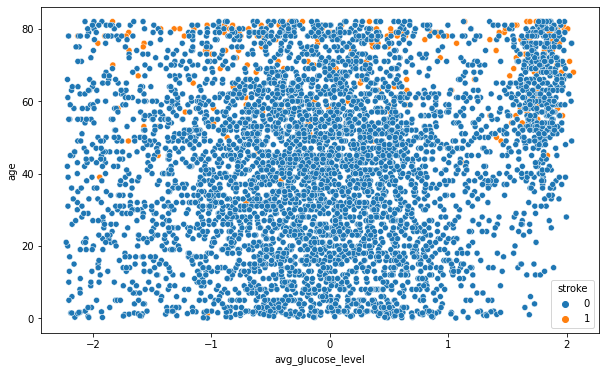

In [68]:
sns.scatterplot(x = 'avg_glucose_level', y = 'age', hue = 'stroke', data = df);

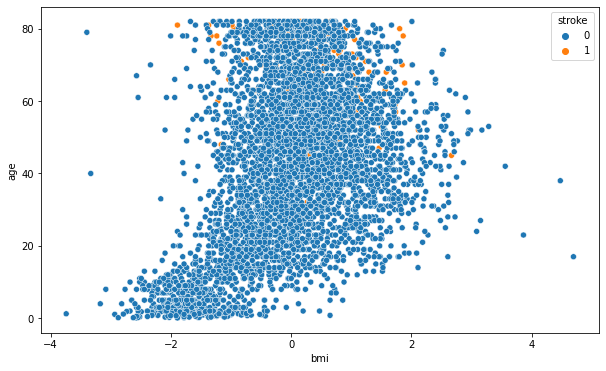

In [69]:
sns.scatterplot(x = 'bmi', y = 'age', hue = 'stroke', data = df);

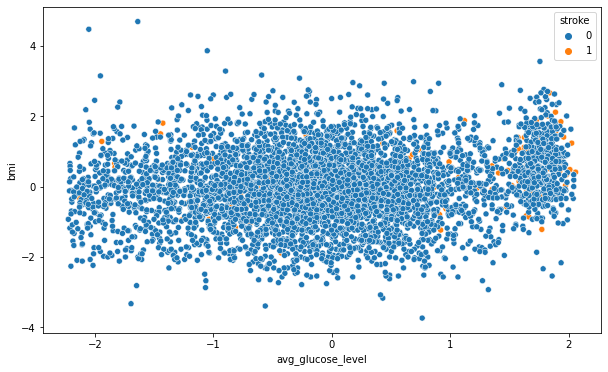

In [70]:
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', hue = 'stroke', data = df);

### 2.8 - Getting Dummies <a class="anchor" id="dummies"></a> 

**Before constructing our model, we should convert some features into dummies.**

In [71]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status', 'stroke',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [72]:
df = pd.get_dummies(df, columns=['gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status',], drop_first=True)

In [73]:
df.head()

age  hypertension  heart_disease  stroke  avg_glucose_level  \
0 67.0000000             0              1       1          1.8623579   
1 61.0000000             0              0       1          1.7004136   
2 80.0000000             0              1       1          0.3947141   
3 49.0000000             0              0       1          1.4449411   
4 79.0000000             1              0       1          1.4727475   

         bmi  gender_Male  ever_married_Yes  work_type_Never_worked  \
0  1.0256983            1                 1                       0   
1        NaN            0                 1                       0   
2  0.5773829            1                 1                       0   
3  0.7918351            0                 1                       0   
4 -0.5679023            0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

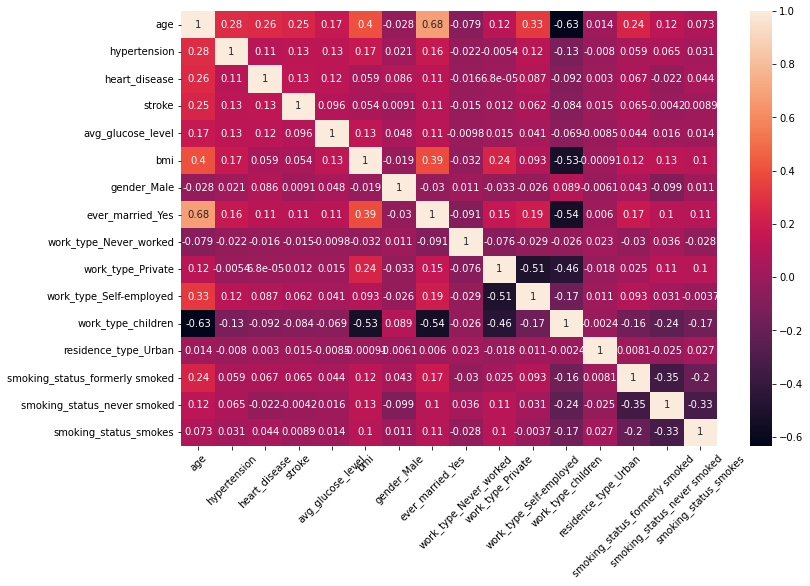

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

## 3) The Implementation of Support Vector Machine (SVM) <a class="anchor" id="svm"></a>   

- We have binary classification problem.

- So we will apply one of the classification model which is Support Vector Classification (SVC) for the target variable of "stroke".

- SVC is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. In general it works best for low-dimensional data.

For more information please refer to: [external link1](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/) and [external link2](http://www.scholarpedia.org/article/Support_vector_clusteringl)

### 3.1 - Train | Test Split & Handling with Missing Values <a class="anchor" id="tts"></a> 

In [75]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**SPECIAL NOTE:**To prevent data leakage we prefer to handle with 201 missing values stored in "bmi" column after train-test split.

It would be more sensible to fill the missing values in "bmi" column with the median by taking the effects of outliers on mean into consideration.

In [77]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

Having imputed train and test sets seperately so that we did not have any data leakage.

In [78]:
imputed_X_train.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [79]:
imputed_X_test.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [80]:
imputed_X_train.age.value_counts().head(10)

78.0000000    71
79.0000000    65
54.0000000    63
50.0000000    62
44.0000000    60
51.0000000    60
55.0000000    59
49.0000000    59
57.0000000    59
52.0000000    58
Name: age, dtype: int64

In [81]:
X_train.age.value_counts().head(10)

78.0000000    71
79.0000000    65
54.0000000    63
50.0000000    62
44.0000000    60
51.0000000    60
55.0000000    59
49.0000000    59
57.0000000    59
52.0000000    58
Name: age, dtype: int64

In [82]:
X_test = imputed_X_test

In [83]:
X_train = imputed_X_train

### 3.2 - Scalling <a class="anchor" id="scalling"></a>  

**StandardScaler:** Assumes that data has normally distributed features and will scale them to zero mean and 1 standard deviation. Use StandardScaler() if you know the data distribution is normal. For most cases StandardScaler would do no harm. Especially when dealing with variance (PCA, clustering, logistic regression, SVMs, perceptron's, neural networks) in fact Standard Scaler would be very important. On the other hand it will not make much of a difference if you are using tree based classifiers or regressors.

**MinMaxScaler :** This will transform each value in the column proportionally within the range [0,1]. This is quite acceptable in cases where we are not concerned about the standardization along the variance axes. e.g. image processing or neural networks expecting values between 0 to 1.

Please for more information, refer to <a href="https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing">Visit HERE</a>

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.3 - Modelling <a class="anchor" id="modelling"></a> 

**SVM Modelling by Default Parameters**  <a class="anchor" id="svmmodelling"></a>  

In [87]:
svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1080  364]
 [  26   63]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.71      0.24        89

    accuracy                           0.75      1533
   macro avg       0.56      0.73      0.55      1533
weighted avg       0.93      0.75      0.81      1533



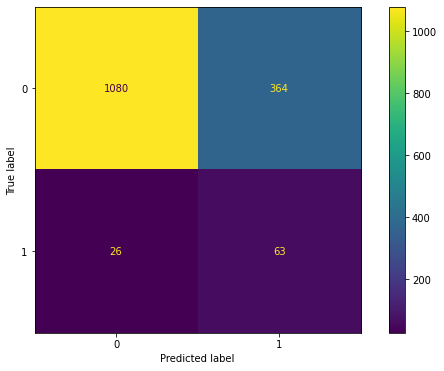

In [88]:
plot_confusion_matrix(svm_model_scaled, X_test_scaled, y_test);

**What can we learn from this matrix?**

There are two possible predicted classes: "yes" and "no". If we were predicting the presence of a disease, for example, "yes" would mean they have the disease, and "no" would mean they don't have the disease.

The classifier made a total of 1533 predictions (e.g., 1533 patients were being tested for the presence of that disease).

Out of those 1533 cases, the classifier predicted "yes" 428 times, and "no" 1125 times.

In reality, 89 patients in the sample have the disease, and 1444 patients do not.


Please for a better understanding, refer to <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">HERE</a> and <a href="https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">HERE</a>

In [89]:
model = SVC(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.7584135
test_precision   0.1080209
test_recall      0.6062500
test_f1          0.1829932
dtype: float64

**SVM With Best Parameters (GridsearchCV)** <a class="anchor" id="GridsearchCV"></a> 


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [92]:
model = SVC(class_weight = "balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [93]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.666, total=   0.4s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.698, total=   0.4s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.678, total=   0.4s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.713, total=   0.4s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.741, total=   0.4s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.696, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.713, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.683, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.727, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  5.3min finished


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [94]:
svm_model_grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [95]:
svm_model_grid.best_estimator_

SVC(C=1000, class_weight='balanced', gamma=1)

In [96]:
y_pred = svm_model_grid.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1330  114]
 [  74   15]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1444
           1       0.12      0.17      0.14        89

    accuracy                           0.88      1533
   macro avg       0.53      0.54      0.54      1533
weighted avg       0.90      0.88      0.89      1533



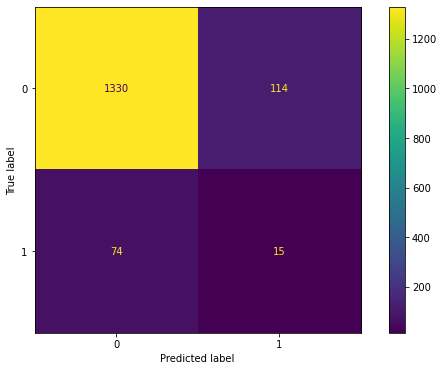

In [97]:
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

**GridSearchCV couldn't make any contribution to our model. Contrary, it decreased our True Positive predictions while increasing True Negatives predictions. What a shame...** 

## 4) Conclusion : <a class="anchor" id="Conclusion"></a> 

- In this study respectively,

- We try to predict classification problem in Stroke Dataset by developing a Support Vector Machine (SVM) model.

- We made the detailed exploratory analysis (EDA).

- We have decided which metrics will be used.

- We have analyzed both target and features in detail.

- We have transformed categorical variables into dummies so we can use them in the model.

- We have handled with skewness problem for make them closer to normal distribution.

- We have decided to use SVC in our study.

- We have cross-checked the model obtained from train set by applying cross validation for the model evaluation.

- We have handled with missing values after train-split for avoiding data leakage.

- We have examined the results of the  model and selected the best one for the problem in hand.

- Further studies will hopefully examine this dataset by using KNN, Logistic Regression, Decision Tree, Random Forests seperatley. And then an evaluation notebook will be submitted for selecting the best model by comparison of each model one another.

- Any contribution will be appriciated.

### Have fun while... 

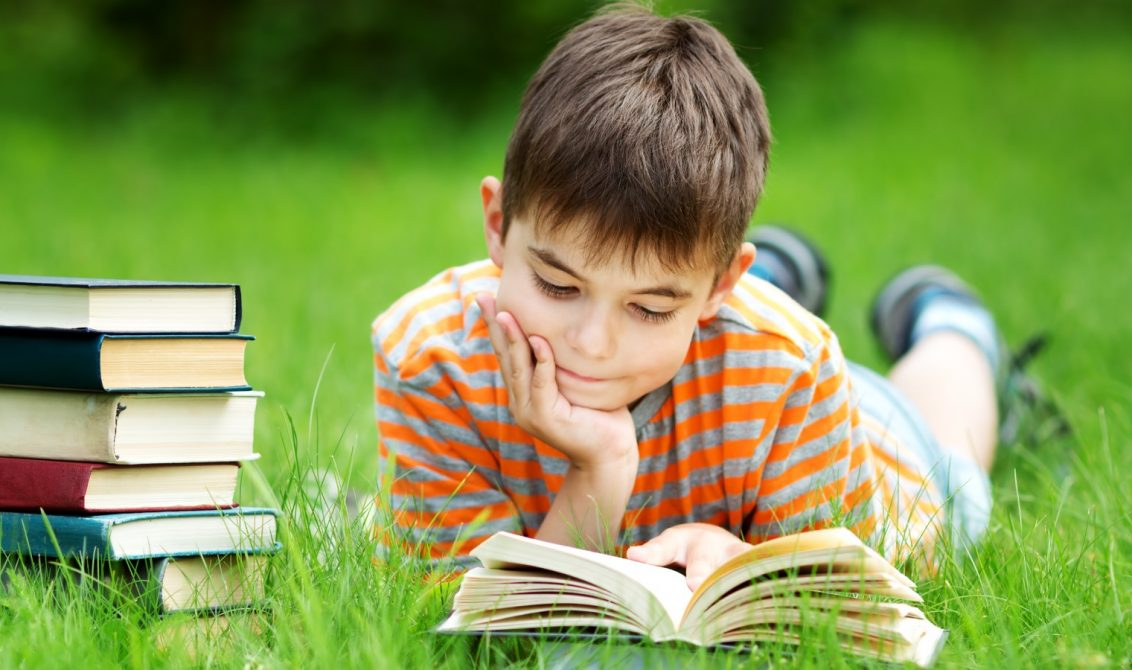